# A look at the development of musical features over time

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tueplots import bundles
plt.rcParams.update(bundles.neurips2021(usetex=False))

First we have a look at the dataset from https://www.kaggle.com/rodolfofigueroa/spotify-12m-songs.
It contains 1,204,015 songs with a given release year and a number of feature for each of them.  
We can immediately make out some features that will not be interesting for our purpose, like the spotify id  or the tracknumber. Other features like danceability and acousticness, while seeming very arbitrary and unclear, could proove to be very interesting.


In [4]:
tracks = pd.read_csv('../data/tracks_features.csv')
tracks = tracks[tracks.year != 0].reset_index()
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204015 entries, 0 to 1204014
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   index             1204015 non-null  int64  
 1   id                1204015 non-null  object 
 2   name              1204015 non-null  object 
 3   album             1204015 non-null  object 
 4   album_id          1204015 non-null  object 
 5   artists           1204015 non-null  object 
 6   artist_ids        1204015 non-null  object 
 7   track_number      1204015 non-null  int64  
 8   disc_number       1204015 non-null  int64  
 9   explicit          1204015 non-null  bool   
 10  danceability      1204015 non-null  float64
 11  energy            1204015 non-null  float64
 12  key               1204015 non-null  int64  
 13  loudness          1204015 non-null  float64
 14  mode              1204015 non-null  int64  
 15  speechiness       1204015 non-null  float64
 16  

Before looking at any of the actual features, lets look at the number of songs in the data, per year.  
This reveals that the dataset is very lobsided towards more recent years, which might be a significant obstacle in trying to distinguish years, based on simple features of the song.  
One possible solution to this, which may or may not be feasible is just extending the dataset to include more old songs. (The feasibility depends on the Spotify API and the question, whether there simply are not enough (labeled) old songs on spotify or there are enough on spotify, just not in the dataset)

Stats: 
release_years.max()=2020
release_years.min()=1900
release_years.mean()=2007.3444874025656
release_years.median()=2009.0
release_years.quantile(q=.055525)=1991.0


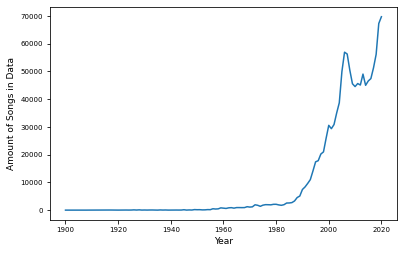

In [14]:
release_years = tracks.year
print(f'Stats: \n{release_years.max()=}\n{release_years.min()=}\n{release_years.mean()=}\n{release_years.median()=}\n{release_years.quantile(q=.055525)=}')
years, counts = np.unique(release_years, return_counts=True)

# fill years with no songs
y = years.copy()
for year in range(y.min(), y.max()):
    if year not in y:
        i = year-1900
        y = np.insert(y, i, year)
        y = np.insert(y, i, 0)
        
fig, ax = plt.subplots()
ax.plot(years, counts)
ax.set_xlabel('Year')
ax.set_ylabel('Amount of Songs in Data')
#ax.vlines(release_years.quantile(q=.05), counts.min() ,counts.max(), label='q0.05', colors='red', )
#ax.legend()
plt.savefig('../figs/data_spread.pdf',bbox_inches='tight')
plt.show()

Putting this potential problem aside for the moment, we look at some possibly interesting features over the release year.  
To do this, we use the average value of the feature in each given year.  
Note that for the only boolean value in this set of features (_explicit_), the average means the percentage of songs that are explicit.  
To be able to look at them all in one plot, we normalize and center them all to be on the interval [-1,1]

In [5]:
interesting_features = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
tracks_by_year_avg = tracks.groupby('year').mean()
display(tracks_by_year_avg[interesting_features])

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
year,,,,,,,,,,,,,,
1900,0.000000,0.483857,0.282193,3.214286,-18.077786,0.785714,0.051693,0.713071,0.736929,0.129264,0.422157,128.728571,500062.000000,3.714286
1908,0.000000,0.604105,0.473695,4.526316,-15.401263,0.789474,0.076395,0.410932,0.007279,0.187263,0.657000,131.799737,226203.473684,3.631579
1909,0.000000,0.617560,0.484800,5.040000,-12.401080,0.760000,0.081800,0.918880,0.170896,0.213696,0.823880,111.968640,175359.440000,4.000000
1917,0.000000,0.506942,0.253687,5.096154,-16.892827,0.615385,0.074713,0.810928,0.364500,0.233617,0.480892,118.500192,259703.826923,3.826923
1920,0.000000,0.562600,0.209664,4.520000,-12.686920,0.720000,0.075524,0.994000,0.185196,0.351440,0.620240,110.697080,180252.800000,3.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.067346,0.494651,0.547020,5.186898,-10.737562,0.644422,0.078495,0.395806,0.297272,0.195107,0.404568,118.940693,253991.736838,3.841293
2017,0.088700,0.495710,0.545366,5.193674,-10.898037,0.640232,0.083405,0.392319,0.292121,0.200037,0.394594,118.728206,253068.069794,3.852401
2018,0.109281,0.517009,0.569536,5.180444,-10.177891,0.631349,0.088274,0.354847,0.270176,0.197222,0.404441,119.539635,246956.888226,3.864778


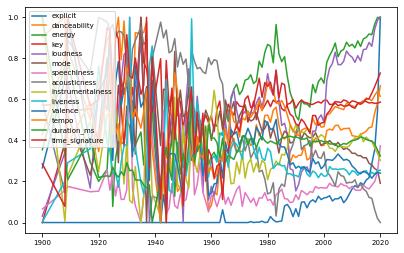

In [6]:
fig, ax = plt.subplots()
for feature in interesting_features:
    minval =  tracks_by_year_avg[feature].min()
    diff = tracks_by_year_avg[feature].max() - minval

    normed = (tracks_by_year_avg[feature]-minval)/diff
    ax.plot(years, normed)
ax.legend(interesting_features)
plt.show()

As this is a very messy plot, we divide the features into subgroups

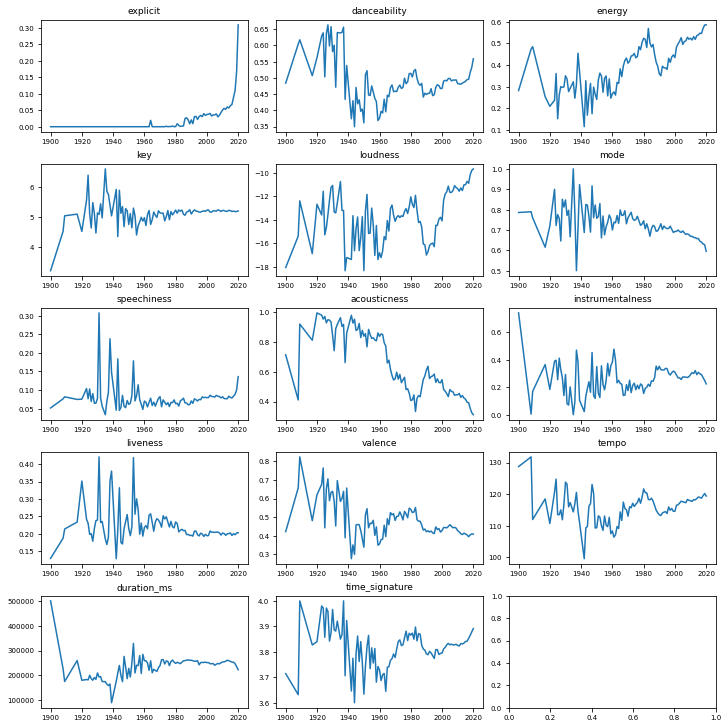

In [14]:
fig, axs = plt.subplots(5,3, figsize=(10, 10))

def plot_feature(ax, feature):
    minval =  tracks_by_year_avg[feature].min()
    diff = tracks_by_year_avg[feature].max() - minval

    normed = (tracks_by_year_avg[feature]-minval)/diff
    ax.set_title(feature)
    ax.plot(years, tracks_by_year_avg[feature])

for i, feature in enumerate(interesting_features):
    plot_feature(axs[i // 3, i % 3], feature)

Beacause the data in years prior to 1990 is very sparse, in fact less than 5% of the d
For further work with this dataset, we will split it into a train and a test dataset:
